Epoch 1/50
31/31 [==============================] - 1s 924us/step - loss: 506.8401
Epoch 2/50
31/31 [==============================] - 0s 744us/step - loss: 493.7763
Epoch 3/50
31/31 [==============================] - 0s 839us/step - loss: 474.4990
Epoch 4/50
31/31 [==============================] - 0s 659us/step - loss: 446.1703
Epoch 5/50
31/31 [==============================] - 0s 707us/step - loss: 408.2200
Epoch 6/50
31/31 [==============================] - 0s 640us/step - loss: 362.4936
Epoch 7/50
31/31 [==============================] - 0s 687us/step - loss: 312.6229
Epoch 8/50
31/31 [==============================] - 0s 694us/step - loss: 263.2510
Epoch 9/50
31/31 [==============================] - 0s 637us/step - loss: 217.3225
Epoch 10/50
31/31 [==============================] - 0s 692us/step - loss: 177.5792
Epoch 11/50
31/31 [==============================] - 0s 698us/step - loss: 144.2416
Epoch 12/50
31/31 [==============================] - 0s 650us/step - loss: 117.5308
E

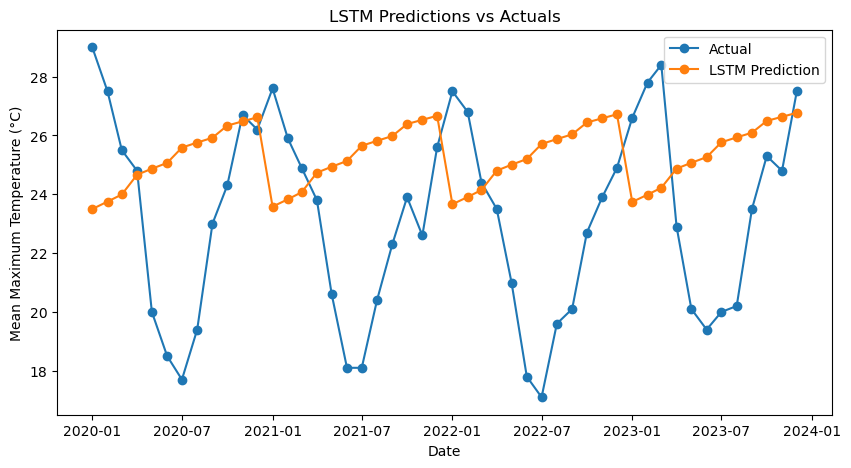

Linear Regression Model:
MAE: 2.7475395267084477
MSE: 10.375549452601279
R-squared (r2) value: 0.04680146980368638


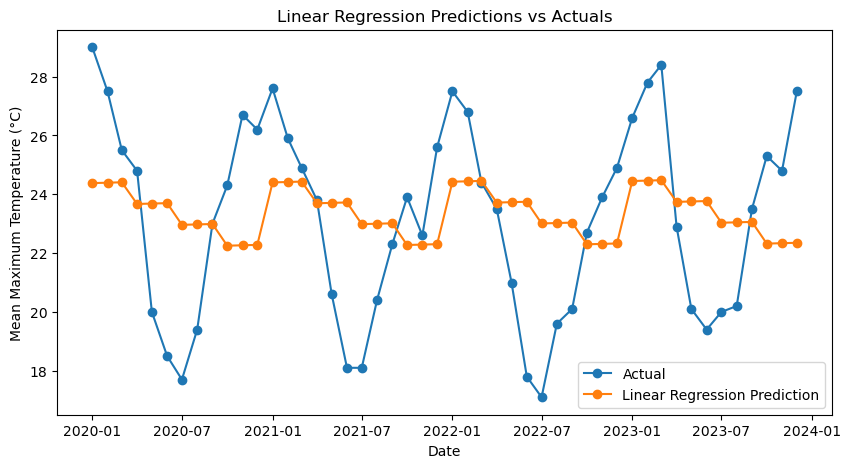

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the data
df = pd.read_csv("Sydney Airport TEMP.csv")

# Feature engineering
df['date'] = pd.to_datetime(dict(year=df.Year, month=df.Month, day=1))
df["month"] = df["date"].dt.month
df["quarter"] = df["date"].dt.quarter
df["day_of_week"] = df["date"].dt.dayofweek

# Creating training and test data
training_mask = df["date"] < "2020-01-1"
training_data = df.loc[training_mask]
testing_mask = df["date"] >= "2020-01-1"
testing_data = df.loc[testing_mask]

# Drop unnecessary columns
training_data = training_data.drop(columns=["date"])
testing_dates = testing_data["date"]
testing_data = testing_data.drop(columns=["date"])

# Split into features and target
X_train = training_data[["month", "quarter", "Year"]]
y_train = training_data["Mean maximum temperature (°C)"]
X_test = testing_data[["month", "quarter", "Year"]]
y_test = testing_data["Mean maximum temperature (°C)"]

# LSTM model
scaler = MinMaxScaler(feature_range=(0, 1))
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_lstm = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_lstm = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

model = Sequential()
model.add(LSTM(50, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

model.fit(X_train_lstm, y_train, epochs=50, batch_size=32, verbose=1)

lstm_predictions = model.predict(X_test_lstm)

# Linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_predictions = linear_model.predict(X_test)

# Evaluation functions
def evaluate_model(y_test, prediction):
    print(f"MAE: {mean_absolute_error(y_test, prediction)}")
    print(f"MSE: {mean_squared_error(y_test, prediction)}")
    r2 = r2_score(y_test, prediction)
    print(f"R-squared (r2) value: {r2}")

# Plotting function
def plot_predictions(testing_dates, y_test, prediction, model_name):
    plt.figure(figsize=(10, 5))
    plt.plot(testing_dates, y_test, label="Actual", marker='o')
    plt.plot(testing_dates, prediction, label=f"{model_name} Prediction", marker='o')
    plt.title(f"{model_name} Predictions vs Actuals")
    plt.xlabel("Date")
    plt.ylabel("Mean Maximum Temperature (°C)")
    plt.legend()
    plt.show()

# Evaluate and plot LSTM predictions
print("LSTM Model:")
evaluate_model(y_test, lstm_predictions)
plot_predictions(testing_dates, y_test, lstm_predictions, "LSTM")

# Evaluate and plot linear regression predictions
print("Linear Regression Model:")
evaluate_model(y_test, linear_predictions)
plot_predictions(testing_dates, y_test, linear_predictions, "Linear Regression")

Epoch 1/100
31/31 [==============================] - 1s 1ms/step - loss: 506.7393
Epoch 2/100
31/31 [==============================] - 0s 921us/step - loss: 488.6084
Epoch 3/100
31/31 [==============================] - 0s 904us/step - loss: 458.2496
Epoch 4/100
31/31 [==============================] - 0s 981us/step - loss: 410.0040
Epoch 5/100
31/31 [==============================] - 0s 950us/step - loss: 346.1160
Epoch 6/100
31/31 [==============================] - 0s 880us/step - loss: 274.3587
Epoch 7/100
31/31 [==============================] - 0s 823us/step - loss: 205.9091
Epoch 8/100
31/31 [==============================] - 0s 944us/step - loss: 149.6283
Epoch 9/100
31/31 [==============================] - 0s 896us/step - loss: 109.0058
Epoch 10/100
31/31 [==============================] - 0s 821us/step - loss: 82.9844
Epoch 11/100
31/31 [==============================] - 0s 857us/step - loss: 67.8705
Epoch 12/100
31/31 [==============================] - 0s 888us/step - loss: 59

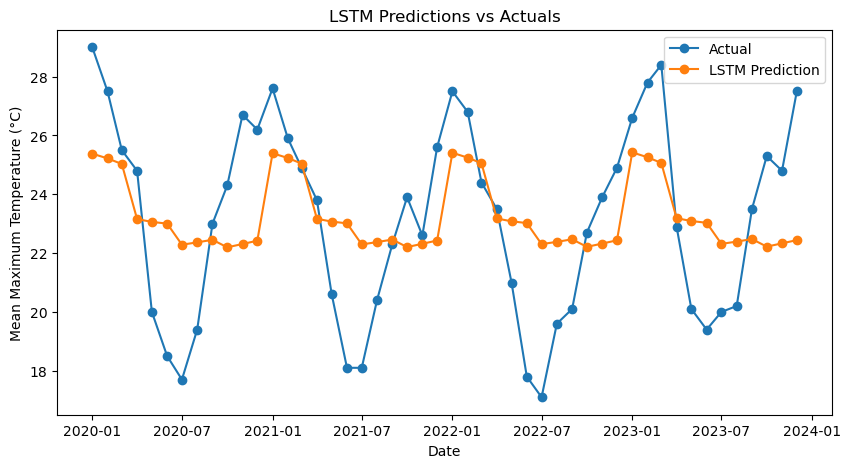

Linear Regression Model:
MAE: 2.7475395267084477
MSE: 10.375549452601279
R-squared (r2) value: 0.04680146980368638


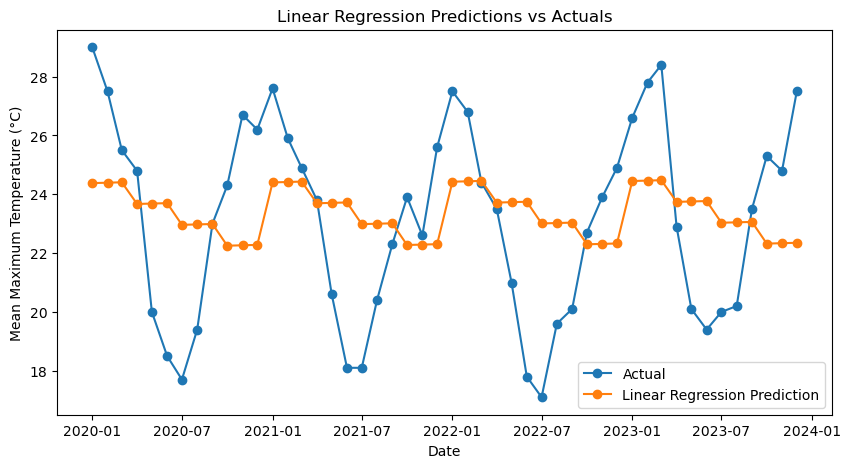

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the data
df = pd.read_csv("Sydney Airport TEMP.csv")

# Feature engineering
df['date'] = pd.to_datetime(dict(year=df.Year, month=df.Month, day=1))
df["month"] = df["date"].dt.month
df["quarter"] = df["date"].dt.quarter
df["day_of_week"] = df["date"].dt.dayofweek

# Creating training and test data
training_mask = df["date"] < "2020-01-1"
training_data = df.loc[training_mask]
testing_mask = df["date"] >= "2020-01-1"
testing_data = df.loc[testing_mask]

# Drop unnecessary columns
training_data = training_data.drop(columns=["date"])
testing_dates = testing_data["date"]
testing_data = testing_data.drop(columns=["date"])

# Split into features and target
X_train = training_data[["month", "quarter", "Year"]]
y_train = training_data["Mean maximum temperature (°C)"]
X_test = testing_data[["month", "quarter", "Year"]]
y_test = testing_data["Mean maximum temperature (°C)"]

# LSTM model
scaler = MinMaxScaler(feature_range=(0, 1))
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_lstm = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_lstm = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

model = Sequential()
model.add(LSTM(100, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

model.fit(X_train_lstm, y_train, epochs=100, batch_size=32, verbose=1)


lstm_predictions = model.predict(X_test_lstm)

# Linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_predictions = linear_model.predict(X_test)

# Evaluation functions
def evaluate_model(y_test, prediction):
    print(f"MAE: {mean_absolute_error(y_test, prediction)}")
    print(f"MSE: {mean_squared_error(y_test, prediction)}")
    r2 = r2_score(y_test, prediction)
    print(f"R-squared (r2) value: {r2}")

# Plotting function
def plot_predictions(testing_dates, y_test, prediction, model_name):
    plt.figure(figsize=(10, 5))
    plt.plot(testing_dates, y_test, label="Actual", marker='o')
    plt.plot(testing_dates, prediction, label=f"{model_name} Prediction", marker='o')
    plt.title(f"{model_name} Predictions vs Actuals")
    plt.xlabel("Date")
    plt.ylabel("Mean Maximum Temperature (°C)")
    plt.legend()
    plt.show()

# Evaluate and plot LSTM predictions
print("LSTM Model:")
evaluate_model(y_test, lstm_predictions)
plot_predictions(testing_dates, y_test, lstm_predictions, "LSTM")

# Evaluate and plot linear regression predictions
print("Linear Regression Model:")
evaluate_model(y_test, linear_predictions)
plot_predictions(testing_dates, y_test, linear_predictions, "Linear Regression")



Epoch 1/200
31/31 [==============================] - 1s 1ms/step - loss: 504.2060
Epoch 2/200
31/31 [==============================] - 0s 1ms/step - loss: 475.5316
Epoch 3/200
31/31 [==============================] - 0s 1ms/step - loss: 421.5617
Epoch 4/200
31/31 [==============================] - 0s 1ms/step - loss: 338.2398
Epoch 5/200
31/31 [==============================] - 0s 1ms/step - loss: 239.9440
Epoch 6/200
31/31 [==============================] - 0s 1ms/step - loss: 153.4230
Epoch 7/200
31/31 [==============================] - 0s 1ms/step - loss: 98.1550
Epoch 8/200
31/31 [==============================] - 0s 1ms/step - loss: 72.7587
Epoch 9/200
31/31 [==============================] - 0s 1ms/step - loss: 63.1260
Epoch 10/200
31/31 [==============================] - 0s 1ms/step - loss: 58.6068
Epoch 11/200
31/31 [==============================] - 0s 1ms/step - loss: 54.9074
Epoch 12/200
31/31 [==============================] - 0s 1ms/step - loss: 51.5784
Epoch 13/200
31/31 

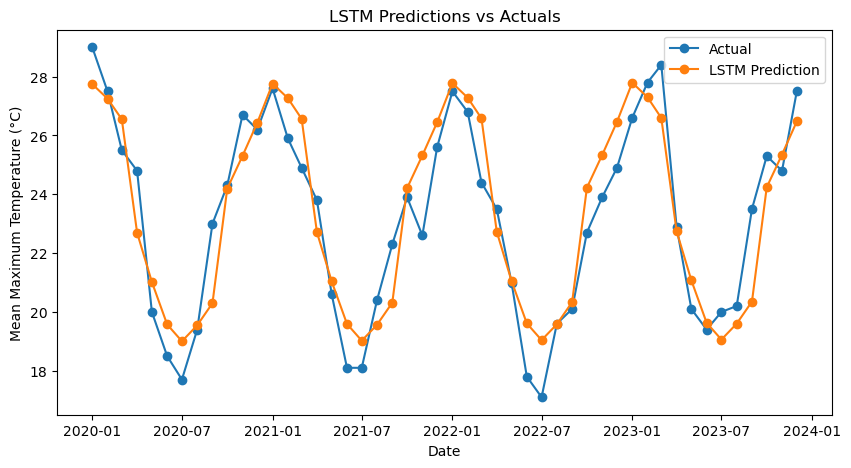

Linear Regression Model:
MAE: 2.7475395267084477
MSE: 10.375549452601279
R-squared (r2) value: 0.04680146980368638


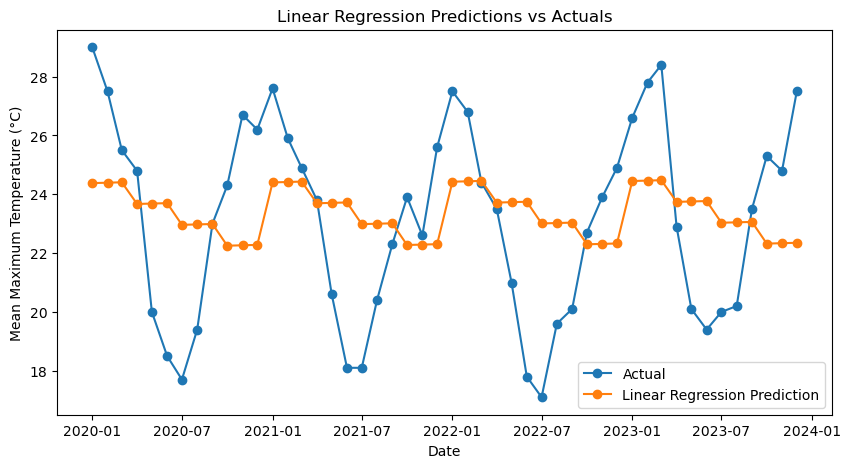

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the data
df = pd.read_csv("Sydney Airport TEMP.csv")

# Feature engineering
df['date'] = pd.to_datetime(dict(year=df.Year, month=df.Month, day=1))
df["month"] = df["date"].dt.month
df["quarter"] = df["date"].dt.quarter
df["day_of_week"] = df["date"].dt.dayofweek

# Creating training and test data
training_mask = df["date"] < "2020-01-1"
training_data = df.loc[training_mask]
testing_mask = df["date"] >= "2020-01-1"
testing_data = df.loc[testing_mask]

# Drop unnecessary columns
training_data = training_data.drop(columns=["date"])
testing_dates = testing_data["date"]
testing_data = testing_data.drop(columns=["date"])

# Split into features and target
X_train = training_data[["month", "quarter", "Year"]]
y_train = training_data["Mean maximum temperature (°C)"]
X_test = testing_data[["month", "quarter", "Year"]]
y_test = testing_data["Mean maximum temperature (°C)"]

# LSTM model
scaler = MinMaxScaler(feature_range=(0, 1))
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_lstm = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_lstm = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

model = Sequential()
model.add(LSTM(200, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

model.fit(X_train_lstm, y_train, epochs=200, batch_size=32, verbose=1)


lstm_predictions = model.predict(X_test_lstm)

# Linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_predictions = linear_model.predict(X_test)

# Evaluation functions
def evaluate_model(y_test, prediction):
    print(f"MAE: {mean_absolute_error(y_test, prediction)}")
    print(f"MSE: {mean_squared_error(y_test, prediction)}")
    r2 = r2_score(y_test, prediction)
    print(f"R-squared (r2) value: {r2}")

# Plotting function
def plot_predictions(testing_dates, y_test, prediction, model_name):
    plt.figure(figsize=(10, 5))
    plt.plot(testing_dates, y_test, label="Actual", marker='o')
    plt.plot(testing_dates, prediction, label=f"{model_name} Prediction", marker='o')
    plt.title(f"{model_name} Predictions vs Actuals")
    plt.xlabel("Date")
    plt.ylabel("Mean Maximum Temperature (°C)")
    plt.legend()
    plt.show()

# Evaluate and plot LSTM predictions
print("LSTM Model:")
evaluate_model(y_test, lstm_predictions)
plot_predictions(testing_dates, y_test, lstm_predictions, "LSTM")

# Evaluate and plot linear regression predictions
print("Linear Regression Model:")
evaluate_model(y_test, linear_predictions)
plot_predictions(testing_dates, y_test, linear_predictions, "Linear Regression")


Epoch 1/300
31/31 [==============================] - 1s 2ms/step - loss: 500.6580
Epoch 2/300
31/31 [==============================] - 0s 3ms/step - loss: 461.1813
Epoch 3/300
31/31 [==============================] - 0s 2ms/step - loss: 385.1035
Epoch 4/300
31/31 [==============================] - 0s 2ms/step - loss: 274.6249
Epoch 5/300
31/31 [==============================] - 0s 2ms/step - loss: 165.5218
Epoch 6/300
31/31 [==============================] - 0s 2ms/step - loss: 96.3970
Epoch 7/300
31/31 [==============================] - 0s 2ms/step - loss: 70.7138
Epoch 8/300
31/31 [==============================] - 0s 2ms/step - loss: 63.1544
Epoch 9/300
31/31 [==============================] - 0s 2ms/step - loss: 58.2875
Epoch 10/300
31/31 [==============================] - 0s 2ms/step - loss: 54.0164
Epoch 11/300
31/31 [==============================] - 0s 2ms/step - loss: 49.8390
Epoch 12/300
31/31 [==============================] - 0s 2ms/step - loss: 46.0043
Epoch 13/300
31/31 [

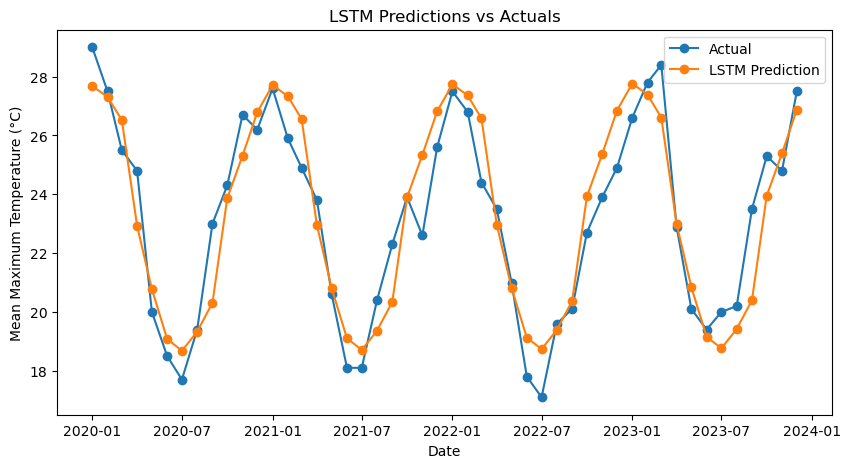

Linear Regression Model:
MAE: 2.7475395267084477
MSE: 10.375549452601279
R-squared (r2) value: 0.04680146980368638


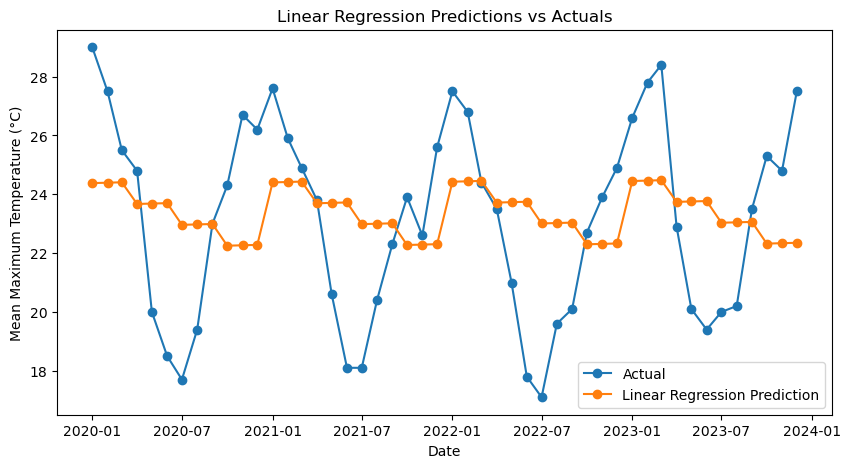

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the data
df = pd.read_csv("Sydney Airport TEMP.csv")

# Feature engineering
df['date'] = pd.to_datetime(dict(year=df.Year, month=df.Month, day=1))
df["month"] = df["date"].dt.month
df["quarter"] = df["date"].dt.quarter
df["day_of_week"] = df["date"].dt.dayofweek

# Creating training and test data
training_mask = df["date"] < "2020-01-1"
training_data = df.loc[training_mask]
testing_mask = df["date"] >= "2020-01-1"
testing_data = df.loc[testing_mask]

# Drop unnecessary columns
training_data = training_data.drop(columns=["date"])
testing_dates = testing_data["date"]
testing_data = testing_data.drop(columns=["date"])

# Split into features and target
X_train = training_data[["month", "quarter", "Year"]]
y_train = training_data["Mean maximum temperature (°C)"]
X_test = testing_data[["month", "quarter", "Year"]]
y_test = testing_data["Mean maximum temperature (°C)"]

# LSTM model
scaler = MinMaxScaler(feature_range=(0, 1))
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_lstm = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_lstm = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

model = Sequential()
model.add(LSTM(300, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

model.fit(X_train_lstm, y_train, epochs=300, batch_size=32, verbose=1)


lstm_predictions = model.predict(X_test_lstm)

# Linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_predictions = linear_model.predict(X_test)

# Evaluation functions
def evaluate_model(y_test, prediction):
    print(f"MAE: {mean_absolute_error(y_test, prediction)}")
    print(f"MSE: {mean_squared_error(y_test, prediction)}")
    r2 = r2_score(y_test, prediction)
    print(f"R-squared (r2) value: {r2}")

# Plotting function
def plot_predictions(testing_dates, y_test, prediction, model_name):
    plt.figure(figsize=(10, 5))
    plt.plot(testing_dates, y_test, label="Actual", marker='o')
    plt.plot(testing_dates, prediction, label=f"{model_name} Prediction", marker='o')
    plt.title(f"{model_name} Predictions vs Actuals")
    plt.xlabel("Date")
    plt.ylabel("Mean Maximum Temperature (°C)")
    plt.legend()
    plt.show()

# Evaluate and plot LSTM predictions
print("LSTM Model:")
evaluate_model(y_test, lstm_predictions)
plot_predictions(testing_dates, y_test, lstm_predictions, "LSTM")

# Evaluate and plot linear regression predictions
print("Linear Regression Model:")
evaluate_model(y_test, linear_predictions)
plot_predictions(testing_dates, y_test, linear_predictions, "Linear Regression")


Incorporating Lag Features - Lag of 1

Epoch 1/300
31/31 [==============================] - 1s 3ms/step - loss: 501.7523
Epoch 2/300
31/31 [==============================] - 0s 2ms/step - loss: 463.4499
Epoch 3/300
31/31 [==============================] - 0s 2ms/step - loss: 388.1517
Epoch 4/300
31/31 [==============================] - 0s 2ms/step - loss: 277.8812
Epoch 5/300
31/31 [==============================] - 0s 2ms/step - loss: 167.2885
Epoch 6/300
31/31 [==============================] - 0s 2ms/step - loss: 96.6161
Epoch 7/300
31/31 [==============================] - 0s 2ms/step - loss: 70.3626
Epoch 8/300
31/31 [==============================] - 0s 2ms/step - loss: 62.6005
Epoch 9/300
31/31 [==============================] - 0s 2ms/step - loss: 57.9823
Epoch 10/300
31/31 [==============================] - 0s 2ms/step - loss: 53.6934
Epoch 11/300
31/31 [==============================] - 0s 2ms/step - loss: 49.6882
Epoch 12/300
31/31 [==============================] - 0s 2ms/step - loss: 45.8515
Epoch 13/300
31/31 [

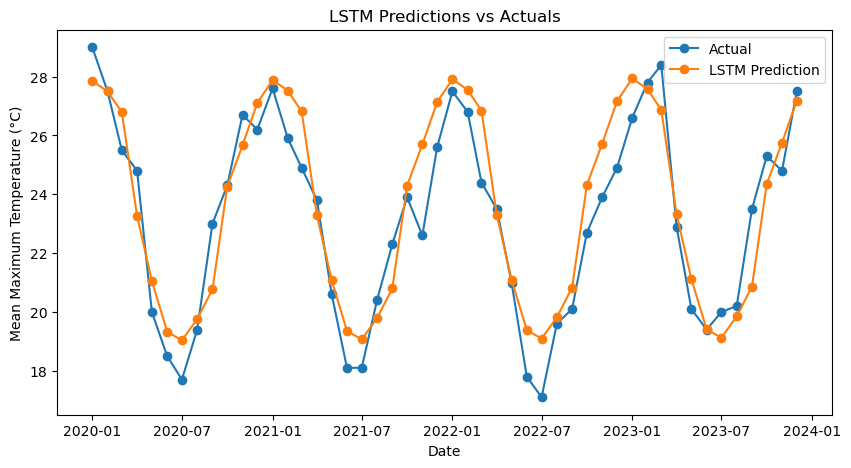

Linear Regression Model:
MAE: 2.747342672821605
MSE: 10.376526071370895
R-squared (r2) value: 0.046711748138341114


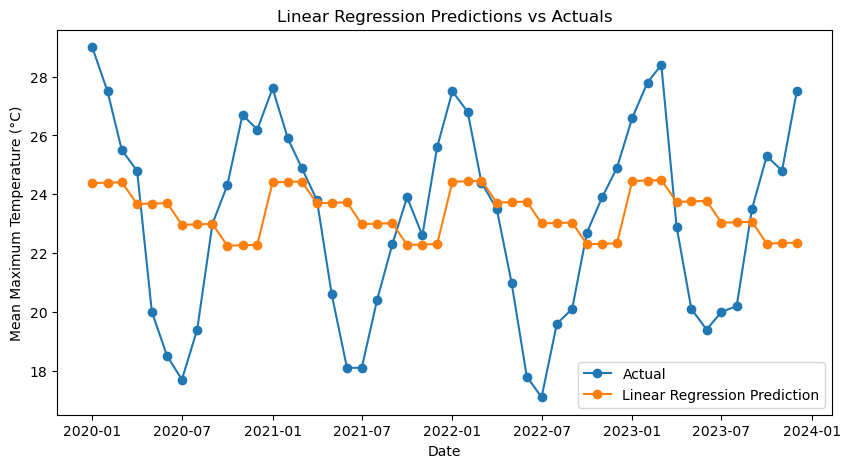

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the data
df = pd.read_csv("Sydney Airport TEMP.csv")

# Feature engineering
df['date'] = pd.to_datetime(dict(year=df.Year, month=df.Month, day=1))
df["month"] = df["date"].dt.month
df["quarter"] = df["date"].dt.quarter
df["day_of_week"] = df["date"].dt.dayofweek

# Adding lagged values
num_lags = 1  # You can adjust the number of lagged values
for i in range(1, num_lags + 1):
    df[f"lag_{i}"] = df["Mean maximum temperature (°C)"].shift(i)

# Drop rows with NaN values introduced by lag
df = df.dropna()

# Creating training and test data
training_mask = df["date"] < "2020-01-1"
training_data = df.loc[training_mask]
testing_mask = df["date"] >= "2020-01-1"
testing_data = df.loc[testing_mask]

# Drop unnecessary columns
training_data = training_data.drop(columns=["date"])
testing_dates = testing_data["date"]
testing_data = testing_data.drop(columns=["date"])

# Split into features and target
X_train = training_data[["month", "quarter", "Year"]]
y_train = training_data["Mean maximum temperature (°C)"]
X_test = testing_data[["month", "quarter", "Year"]]
y_test = testing_data["Mean maximum temperature (°C)"]

# LSTM model
scaler = MinMaxScaler(feature_range=(0, 1))
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_lstm = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_lstm = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

model = Sequential()
model.add(LSTM(300, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

model.fit(X_train_lstm, y_train, epochs=300, batch_size=32, verbose=1)


lstm_predictions = model.predict(X_test_lstm)

# Linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_predictions = linear_model.predict(X_test)

# Evaluation functions
def evaluate_model(y_test, prediction):
    print(f"MAE: {mean_absolute_error(y_test, prediction)}")
    print(f"MSE: {mean_squared_error(y_test, prediction)}")
    r2 = r2_score(y_test, prediction)
    print(f"R-squared (r2) value: {r2}")

# Plotting function
def plot_predictions(testing_dates, y_test, prediction, model_name):
    plt.figure(figsize=(10, 5))
    plt.plot(testing_dates, y_test, label="Actual", marker='o')
    plt.plot(testing_dates, prediction, label=f"{model_name} Prediction", marker='o')
    plt.title(f"{model_name} Predictions vs Actuals")
    plt.xlabel("Date")
    plt.ylabel("Mean Maximum Temperature (°C)")
    plt.legend()
    plt.show()

# Evaluate and plot LSTM predictions
print("LSTM Model:")
evaluate_model(y_test, lstm_predictions)
plot_predictions(testing_dates, y_test, lstm_predictions, "LSTM")

# Evaluate and plot linear regression predictions
print("Linear Regression Model:")
evaluate_model(y_test, linear_predictions)
plot_predictions(testing_dates, y_test, linear_predictions, "Linear Regression")


Incorporating Lag Features - Lag of 12

Epoch 1/300
30/30 [==============================] - 1s 2ms/step - loss: 501.0255
Epoch 2/300
30/30 [==============================] - 0s 2ms/step - loss: 464.4389
Epoch 3/300
30/30 [==============================] - 0s 2ms/step - loss: 394.1943
Epoch 4/300
30/30 [==============================] - 0s 2ms/step - loss: 289.9251
Epoch 5/300
30/30 [==============================] - 0s 2ms/step - loss: 180.7540
Epoch 6/300
30/30 [==============================] - 0s 2ms/step - loss: 105.6643
Epoch 7/300
30/30 [==============================] - 0s 2ms/step - loss: 73.8835
Epoch 8/300
30/30 [==============================] - 0s 2ms/step - loss: 64.1762
Epoch 9/300
30/30 [==============================] - 0s 2ms/step - loss: 59.3779
Epoch 10/300
30/30 [==============================] - 0s 2ms/step - loss: 55.0507
Epoch 11/300
30/30 [==============================] - 0s 2ms/step - loss: 50.9791
Epoch 12/300
30/30 [==============================] - 0s 2ms/step - loss: 47.1070
Epoch 13/300
30/30 

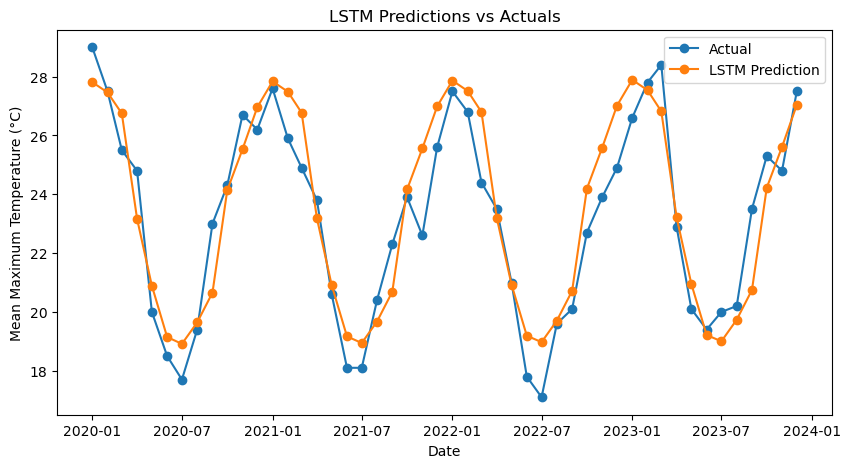

Linear Regression Model:
MAE: 2.74369747389717
MSE: 10.383638871797226
R-squared (r2) value: 0.046058297355524136


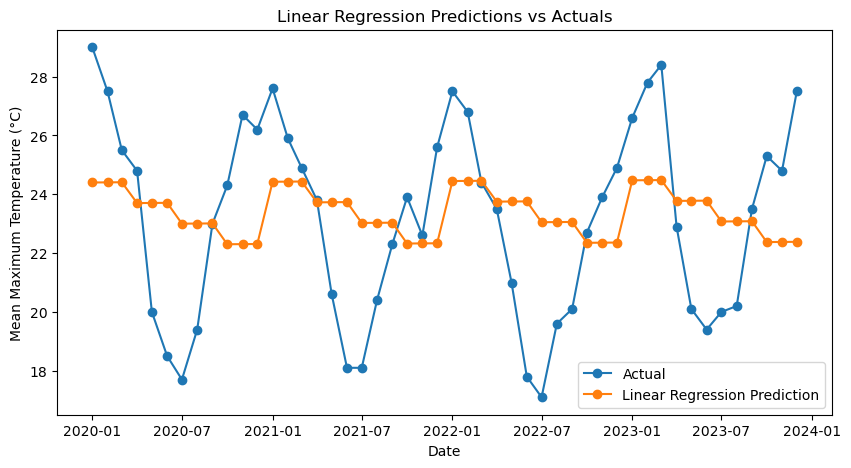

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the data
df = pd.read_csv("Sydney Airport TEMP.csv")

# Feature engineering
df['date'] = pd.to_datetime(dict(year=df.Year, month=df.Month, day=1))
df["month"] = df["date"].dt.month
df["quarter"] = df["date"].dt.quarter
df["day_of_week"] = df["date"].dt.dayofweek

# Adding lagged values
num_lags = 12  # You can adjust the number of lagged values
for i in range(1, num_lags + 1):
    df[f"lag_{i}"] = df["Mean maximum temperature (°C)"].shift(i)

# Drop rows with NaN values introduced by lag
df = df.dropna()

# Creating training and test data
training_mask = df["date"] < "2020-01-1"
training_data = df.loc[training_mask]
testing_mask = df["date"] >= "2020-01-1"
testing_data = df.loc[testing_mask]

# Drop unnecessary columns
training_data = training_data.drop(columns=["date"])
testing_dates = testing_data["date"]
testing_data = testing_data.drop(columns=["date"])

# Split into features and target
X_train = training_data[["month", "quarter", "Year"]]
y_train = training_data["Mean maximum temperature (°C)"]
X_test = testing_data[["month", "quarter", "Year"]]
y_test = testing_data["Mean maximum temperature (°C)"]

# LSTM model
scaler = MinMaxScaler(feature_range=(0, 1))
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_lstm = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_lstm = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

model = Sequential()
model.add(LSTM(300, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

model.fit(X_train_lstm, y_train, epochs=300, batch_size=32, verbose=1)


lstm_predictions = model.predict(X_test_lstm)

# Linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_predictions = linear_model.predict(X_test)

# Evaluation functions
def evaluate_model(y_test, prediction):
    print(f"MAE: {mean_absolute_error(y_test, prediction)}")
    print(f"MSE: {mean_squared_error(y_test, prediction)}")
    r2 = r2_score(y_test, prediction)
    print(f"R-squared (r2) value: {r2}")

# Plotting function
def plot_predictions(testing_dates, y_test, prediction, model_name):
    plt.figure(figsize=(10, 5))
    plt.plot(testing_dates, y_test, label="Actual", marker='o')
    plt.plot(testing_dates, prediction, label=f"{model_name} Prediction", marker='o')
    plt.title(f"{model_name} Predictions vs Actuals")
    plt.xlabel("Date")
    plt.ylabel("Mean Maximum Temperature (°C)")
    plt.legend()
    plt.show()

# Evaluate and plot LSTM predictions
print("LSTM Model:")
evaluate_model(y_test, lstm_predictions)
plot_predictions(testing_dates, y_test, lstm_predictions, "LSTM")

# Evaluate and plot linear regression predictions
print("Linear Regression Model:")
evaluate_model(y_test, linear_predictions)
plot_predictions(testing_dates, y_test, linear_predictions, "Linear Regression")


Incorporating LSTM = 500, EPOCHs=500, Lags = 12

In [ ]:
Optimisation

Epoch 1/500
30/30 [==============================] - 1s 4ms/step - loss: 496.2444
Epoch 2/500
30/30 [==============================] - 0s 3ms/step - loss: 440.2235
Epoch 3/500
30/30 [==============================] - 0s 3ms/step - loss: 332.9162
Epoch 4/500
30/30 [==============================] - 0s 3ms/step - loss: 196.9463
Epoch 5/500
30/30 [==============================] - 0s 3ms/step - loss: 100.7660
Epoch 6/500
30/30 [==============================] - 0s 3ms/step - loss: 70.2015
Epoch 7/500
30/30 [==============================] - 0s 3ms/step - loss: 62.5186
Epoch 8/500
30/30 [==============================] - 0s 3ms/step - loss: 56.9187
Epoch 9/500
30/30 [==============================] - 0s 3ms/step - loss: 51.6868
Epoch 10/500
30/30 [==============================] - 0s 3ms/step - loss: 46.8143
Epoch 11/500
30/30 [==============================] - 0s 3ms/step - loss: 42.4416
Epoch 12/500
30/30 [==============================] - 0s 4ms/step - loss: 38.3782
Epoch 13/500
30/30 [

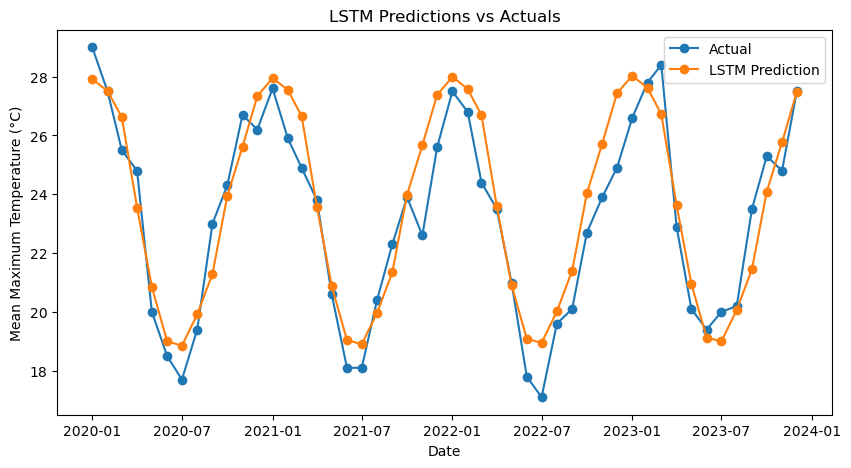

Linear Regression Model:
MAE: 2.74369747389717
MSE: 10.383638871797226
R-squared (r2) value: 0.046058297355524136


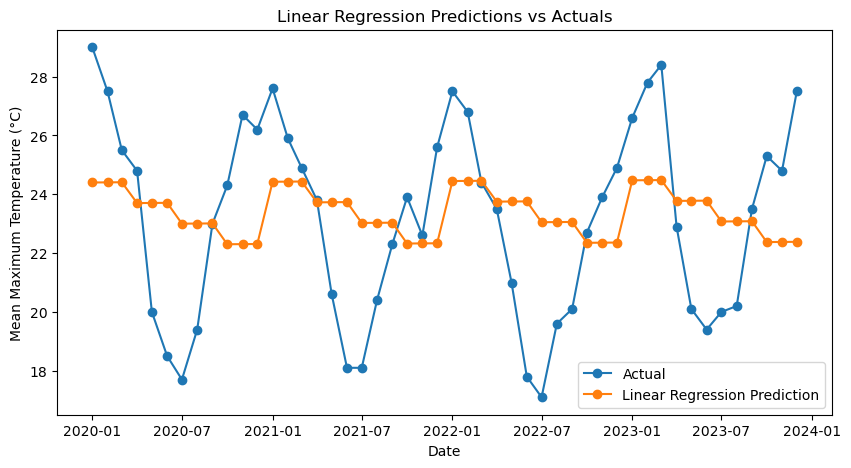

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the data
df = pd.read_csv("Sydney Airport TEMP.csv")

# Feature engineering
df['date'] = pd.to_datetime(dict(year=df.Year, month=df.Month, day=1))
df["month"] = df["date"].dt.month
df["quarter"] = df["date"].dt.quarter
df["day_of_week"] = df["date"].dt.dayofweek

# Adding lagged values
num_lags = 12  # You can adjust the number of lagged values
for i in range(1, num_lags + 1):
    df[f"lag_{i}"] = df["Mean maximum temperature (°C)"].shift(i)

# Drop rows with NaN values introduced by lag
df = df.dropna()

# Creating training and test data
training_mask = df["date"] < "2020-01-1"
training_data = df.loc[training_mask]
testing_mask = df["date"] >= "2020-01-1"
testing_data = df.loc[testing_mask]

# Drop unnecessary columns
training_data = training_data.drop(columns=["date"])
testing_dates = testing_data["date"]
testing_data = testing_data.drop(columns=["date"])

# Split into features and target
X_train = training_data[["month", "quarter", "Year"]]
y_train = training_data["Mean maximum temperature (°C)"]
X_test = testing_data[["month", "quarter", "Year"]]
y_test = testing_data["Mean maximum temperature (°C)"]

# LSTM model
scaler = MinMaxScaler(feature_range=(0, 1))
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_lstm = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_lstm = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

model = Sequential()
model.add(LSTM(500, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

model.fit(X_train_lstm, y_train, epochs=500, batch_size=32, verbose=1)


lstm_predictions = model.predict(X_test_lstm)

# Linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_predictions = linear_model.predict(X_test)

# Evaluation functions
def evaluate_model(y_test, prediction):
    print(f"MAE: {mean_absolute_error(y_test, prediction)}")
    print(f"MSE: {mean_squared_error(y_test, prediction)}")
    r2 = r2_score(y_test, prediction)
    print(f"R-squared (r2) value: {r2}")

# Plotting function
def plot_predictions(testing_dates, y_test, prediction, model_name):
    plt.figure(figsize=(10, 5))
    plt.plot(testing_dates, y_test, label="Actual", marker='o')
    plt.plot(testing_dates, prediction, label=f"{model_name} Prediction", marker='o')
    plt.title(f"{model_name} Predictions vs Actuals")
    plt.xlabel("Date")
    plt.ylabel("Mean Maximum Temperature (°C)")
    plt.legend()
    plt.show()

# Evaluate and plot LSTM predictions
print("LSTM Model:")
evaluate_model(y_test, lstm_predictions)
plot_predictions(testing_dates, y_test, lstm_predictions, "LSTM")

# Evaluate and plot linear regression predictions
print("Linear Regression Model:")
evaluate_model(y_test, linear_predictions)
plot_predictions(testing_dates, y_test, linear_predictions, "Linear Regression")
